## Library Import


In [122]:
import pandas as pd
import numpy as np

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid',context='notebook')


In [124]:
Data = pd.read_csv('apartments_clean.csv', sep=',', encoding='latin-1')

In [125]:
Col=Data.columns.values
print(Col)

['bathrooms' 'bedrooms' 'price' 'square_feet' 'category_encoded'
 'amenities_encoded' 'has_photo_encoded' 'pets_allowed_encoded'
 'cityname_encoded' 'state_encoded' 'source_encoded']


## Correlation Matrix

<Axes: >

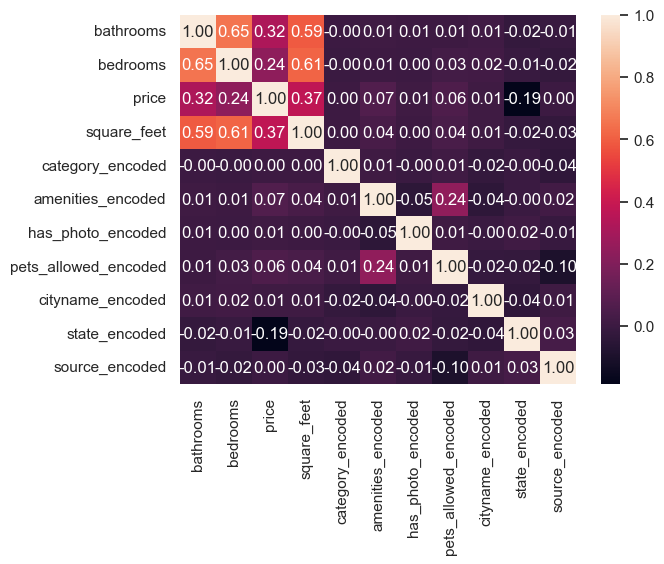

In [126]:
Cor=Data.corr()
sns.heatmap(Cor,cbar=True,annot=True,yticklabels=Col,xticklabels=Col,fmt=".2f")

In [127]:
Data.describe()

,bathrooms,bedrooms,price,square_feet,category_encoded,amenities_encoded,has_photo_encoded,pets_allowed_encoded,cityname_encoded,state_encoded,source_encoded
count,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000,99488.000000
mean,1.416693,1.726057,1526.990893,956.404551,0.001860,7461.395786,1.470006,2.806027,1350.722549,24.491416,16.037643
std,0.532570,0.751169,903.990937,417.461141,0.079365,2859.834899,0.659040,1.492614,839.906216,15.262477,1.186923
min,0.000000,0.000000,0.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1013.000000,729.000000,0.000000,6177.000000,1.000000,1.000000,624.000000,9.000000,16.000000
50%,1.000000,2.000000,1350.000000,900.000000,0.000000,9163.000000,2.000000,4.000000,1358.000000,27.000000,16.000000
75%,2.000000,2.000000,1795.000000,1115.000000,0.000000,9523.000000,2.000000,4.000000,2084.000000,42.000000,16.000000
max,9.000000,9.000000,52500.000000,50000.000000,6.000000,9825.000000,2.000000,4.000000,2978.000000,51.000000,24.000000


In [128]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
Data_to_model=Data[['bathrooms','bedrooms','square_feet','price']]
Data_to_model.describe()

,bathrooms,bedrooms,square_feet,price
count,99488.000000,99488.000000,99488.000000,99488.000000
mean,1.416693,1.726057,956.404551,1526.990893
std,0.532570,0.751169,417.461141,903.990937
min,0.000000,0.000000,101.000000,0.000000
25%,1.000000,1.000000,729.000000,1013.000000
50%,1.000000,2.000000,900.000000,1350.000000
75%,2.000000,2.000000,1115.000000,1795.000000
max,9.000000,9.000000,50000.000000,52500.000000


<Axes: >

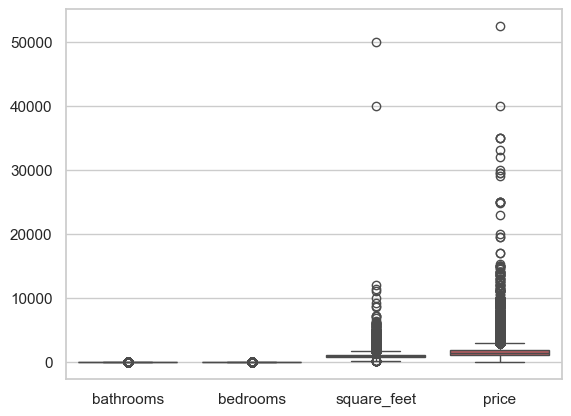

In [129]:
sns.boxplot(Data_to_model)

In [130]:
import pandas as pd


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers_iqr(Data_to_model, "price")
df_cleaned = remove_outliers_iqr(Data_to_model, "square_feet")

print(f"Datos después de eliminar outliers: {df_cleaned.shape}")


Datos después de eliminar outliers: (96644, 4)


In [131]:
df_cleaned.describe()

,bathrooms,bedrooms,square_feet,price
count,96644.000000,96644.000000,96644.000000,96644.000000
mean,1.390402,1.676731,916.550733,1486.972880
std,0.498543,0.683360,259.477884,735.453669
min,0.000000,0.000000,150.000000,0.000000
25%,1.000000,1.000000,725.000000,1000.000000
50%,1.000000,2.000000,896.000000,1335.000000
75%,2.000000,2.000000,1100.000000,1761.000000
max,4.000000,6.000000,1694.000000,52500.000000


<Axes: >

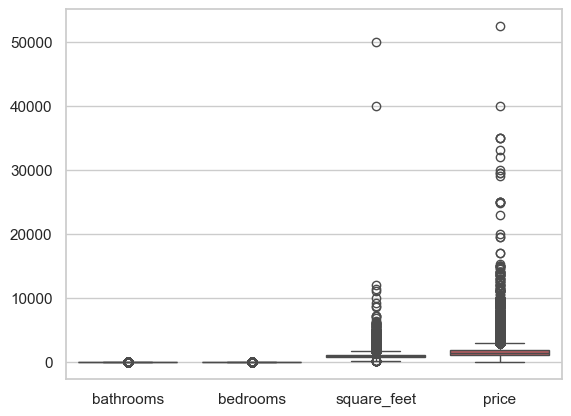

In [132]:
sns.boxplot(Data_to_model)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_3288\2947694334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['bathrooms','bedrooms','square_feet','price']]=scaler.fit_transform(df_cleaned[['bathrooms','bedrooms','square_feet','price']])


<Axes: ylabel='Count'>

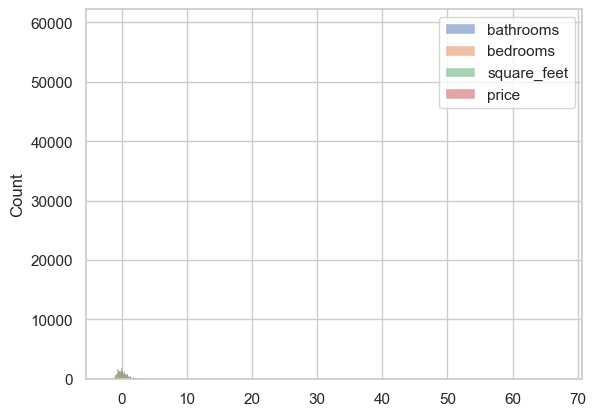

In [133]:

df_cleaned[['bathrooms','bedrooms','square_feet','price']]=scaler.fit_transform(df_cleaned[['bathrooms','bedrooms','square_feet','price']])
sns.histplot(df_cleaned)

In [134]:
df_cleaned.describe()

,bathrooms,bedrooms,square_feet,price
count,96644.000000,96644.000000,96644.000000,96644.000000
mean,0.390402,-0.323269,0.054802,0.199702
std,0.498543,0.683360,0.691941,0.966431
min,-1.000000,-2.000000,-1.989333,-1.754271
25%,0.000000,-1.000000,-0.456000,-0.440210
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.544000,0.559790
max,3.000000,4.000000,2.128000,67.233903


<Axes: >

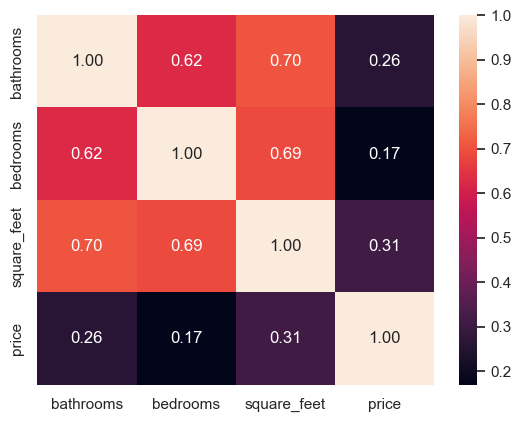

In [135]:
Cor_mod=df_cleaned.corr()
sns.heatmap(Cor_mod,cbar=True,annot=True,yticklabels=Data_to_model.columns.values,xticklabels=Data_to_model.columns.values,fmt=".2f")

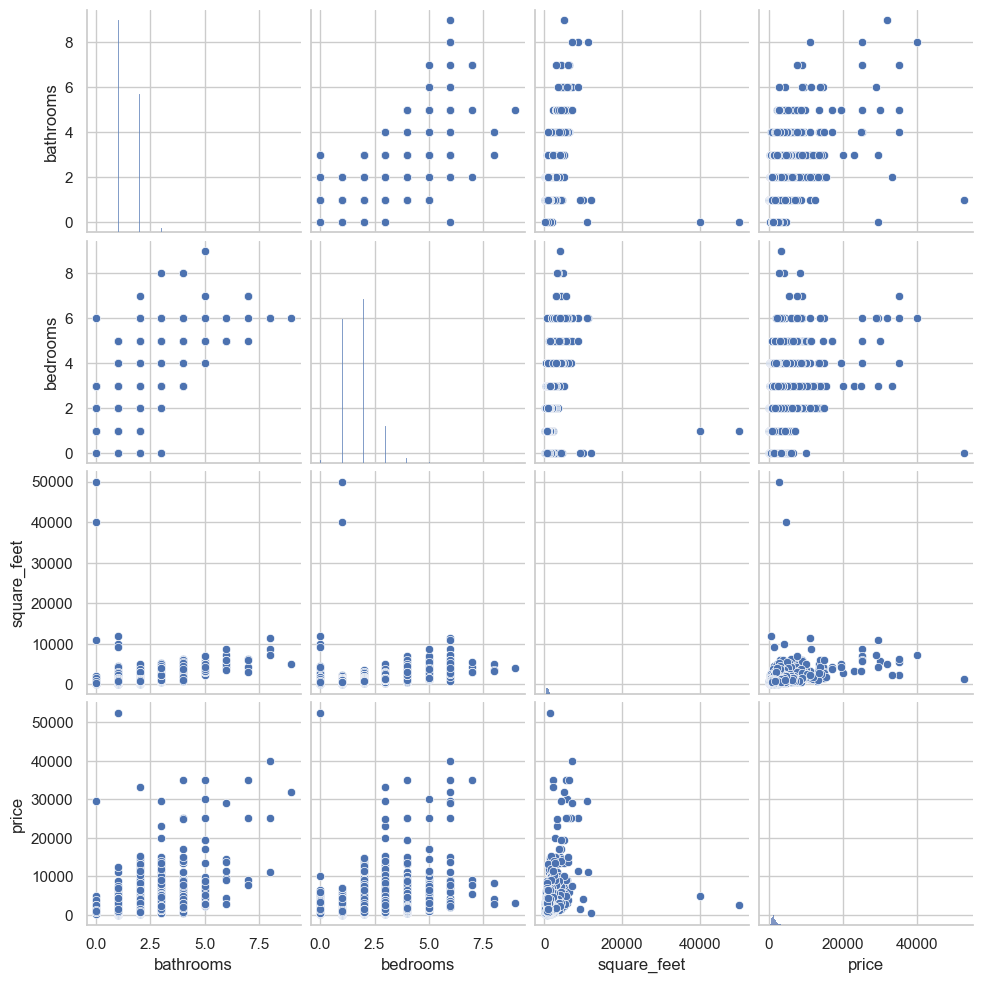

In [136]:
sns.pairplot(Data_to_model[Data_to_model.columns.values])

## Implementation of model

In [137]:
#Reduciendo Variables

C:\Users\SANTI\AppData\Local\Temp\ipykernel_3288\3606644652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_to_model_2['Bathrooms+Beedrooms']=Data_to_model_2['bathrooms']+Data_to_model_2['bedrooms']


<Axes: >

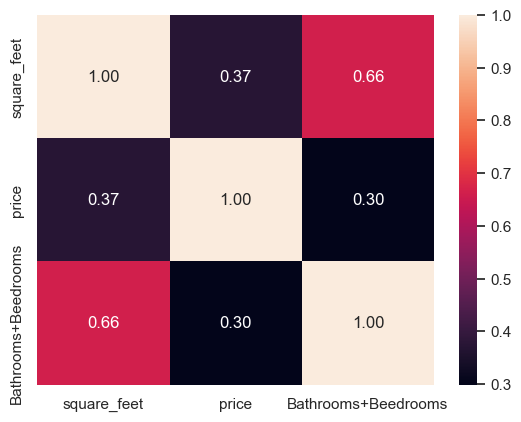

In [138]:
Data_to_model_2=Data[['bathrooms','bedrooms','square_feet','price']]
Data_to_model_2['Bathrooms+Beedrooms']=Data_to_model_2['bathrooms']+Data_to_model_2['bedrooms']
Data_to_model_2=Data_to_model_2.drop(columns=['bathrooms','bedrooms'])
Corr=Data_to_model_2.corr()
Colums=Data_to_model_2.columns.values
sns.heatmap(Corr,cbar=True,annot=True,yticklabels=Colums,xticklabels=Colums,fmt=".2f")

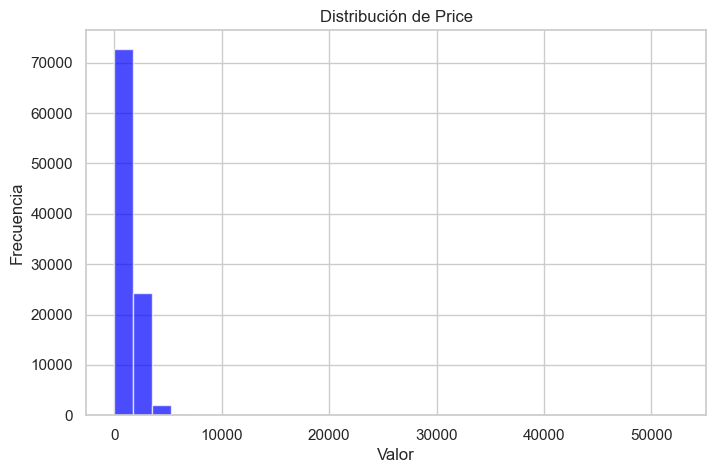

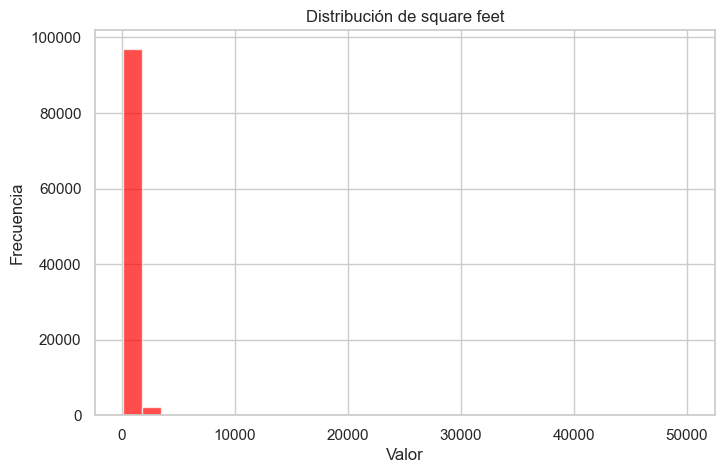

In [139]:
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.hist(Data_to_model_2['price'], bins=30, color='blue', alpha=0.7)
ax1.set_title("Distribución de Price")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")
plt.show()

# Crear segunda figura
fig2, ax2 = plt.subplots(figsize=(8, 5))

ax2.hist(Data_to_model_2['square_feet'], bins=30, color='red', alpha=0.7)
ax2.set_title("Distribución de square feet")
ax2.set_xlabel("Valor")
ax2.set_ylabel("Frecuencia")
plt.show()


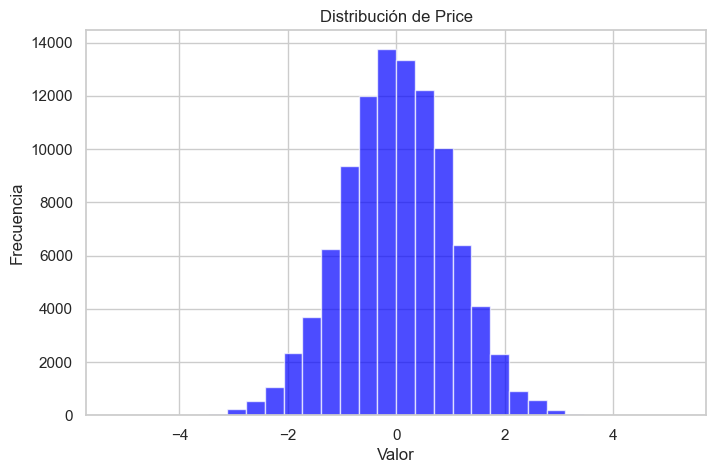

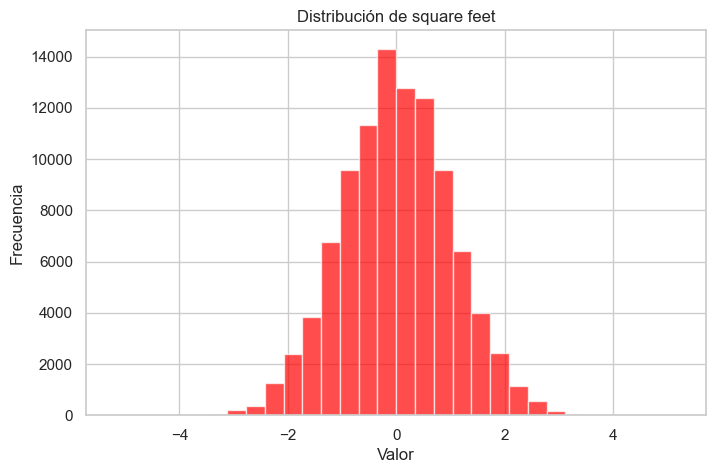

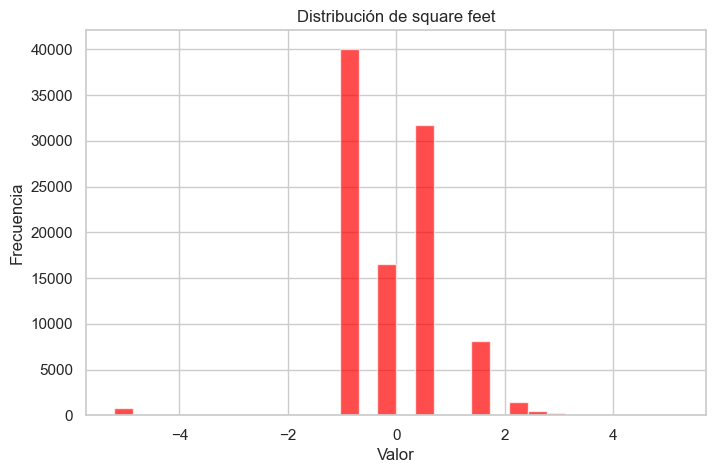

In [140]:
from sklearn.preprocessing import QuantileTransformer

Data_to_model_2['square_feet']=np.log10(Data_to_model_2['square_feet'])
scaler = QuantileTransformer(output_distribution='normal')
Data_to_model_2['square_feet'] = scaler.fit_transform(Data_to_model_2[['square_feet']])
Data_to_model_2['price']=np.log10(Data_to_model_2['price']+1)
scaler = QuantileTransformer(output_distribution='normal')
Data_to_model_2['price'] = scaler.fit_transform(Data_to_model_2[['price']])
scaler = QuantileTransformer(output_distribution='normal')
Data_to_model_2['Bathrooms+Beedrooms'] = scaler.fit_transform(Data_to_model_2[['Bathrooms+Beedrooms']])
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.hist(Data_to_model_2['price'], bins=30, color='blue', alpha=0.7)
ax1.set_title("Distribución de Price")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")
plt.show()

# Crear segunda figura
fig2, ax2 = plt.subplots(figsize=(8, 5))
ax2.hist(Data_to_model_2['square_feet'], bins=30, color='red', alpha=0.7)
ax2.set_title("Distribución de square feet")
ax2.set_xlabel("Valor")
ax2.set_ylabel("Frecuencia")
plt.show()
fig3, ax3 = plt.subplots(figsize=(8, 5))
ax3.hist(Data_to_model_2['Bathrooms+Beedrooms'], bins=30, color='red', alpha=0.7)
ax3.set_title("Distribución de square feet")
ax3.set_xlabel("Valor")
ax3.set_ylabel("Frecuencia")
plt.show()

                     square_feet     price  Bathrooms+Beedrooms
square_feet             1.000000  0.393351             0.734930
price                   0.393351  1.000000             0.278853
Bathrooms+Beedrooms     0.734930  0.278853             1.000000


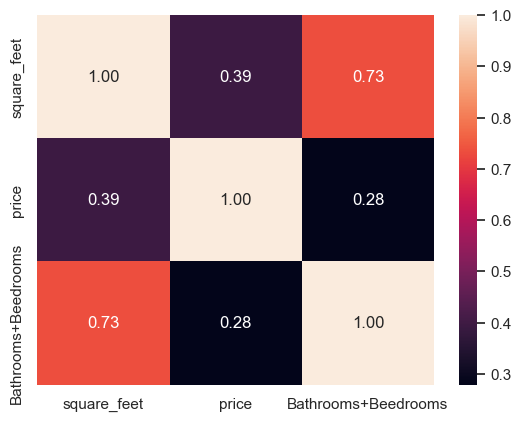

In [141]:

Corr_2=Data_to_model_2.corr()
Colums=Data_to_model_2.columns.values
sns.heatmap(Corr_2,cbar=True,annot=True,yticklabels=Colums,xticklabels=Colums,fmt=".2f")
print(Corr_2)

In [142]:
y = Data_to_model_2.pop('square_feet')
x=Data_to_model_2.copy()

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [144]:
from sklearn.linear_model import LinearRegression


In [145]:
lr=LinearRegression()
Mod_2=lr.fit(X_train,Y_train)


In [146]:
import statsmodels.api as sm
import numpy as np

# Agregar una constante a X_test (para el intercepto)
X_test_sm = sm.add_constant(X_test)

# Obtener los coeficientes desde el modelo entrenado
coeficientes = np.append(Mod_2.intercept_, Mod_2.coef_)

# Calcular los p-valores usando statsmodels
modelo_stats = sm.OLS(Y_test, X_test_sm).fit()

# Mostrar el resumen con p-valores
print(modelo_stats.summary())


                            OLS Regression Results                            
Dep. Variable:            square_feet   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                 1.432e+04
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:19:46   Log-Likelihood:                -19291.
No. Observations:               19898   AIC:                         3.859e+04
Df Residuals:                   19895   BIC:                         3.861e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0004    

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [148]:
Mod_2.intercept_ = float(Mod_2.intercept_)  # Asegura que sea un escalar
Mod_2.coef_ = Mod_2.coef_.flatten()  # Convierte coeficientes en vector 1D
Y_test = Y_test.values.flatten()  # Convierte Y_test en vector 1D

# Predicciones
Y_pred = Mod_2.predict(X_test)

# Mostrar resultados
print('======= Summary ========')
print(f'Intercepto (b): {Mod_2.intercept_}')
print(f'Coeficientes (m): {Mod_2.coef_}')
print(f'Error Cuadrático Medio (MSE): {mean_squared_error(Y_test, Y_pred)}')
print(f'R² Score: {r2_score(Y_test, Y_pred)}')
print(Mod_2.score(X_test,Y_test))

======= Summary ========
Intercepto (b): -0.005800804673448192
Coeficientes (m): [0.20679567 0.69820598]
Error Cuadrático Medio (MSE): 0.4070993403784394
R² Score: 0.5900649038571717
0.5900649038571717


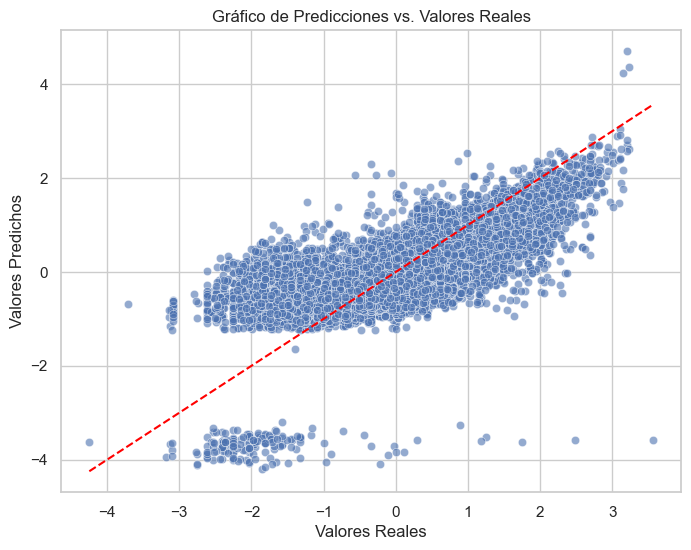

In [149]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.6)  # Puntos dispersos
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Línea ideal

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Predicciones vs. Valores Reales")
plt.show()


In [150]:
'''import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 📌 Definir los modelos y sus hiperparámetros
param_grid = [
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1, 10, 100]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, None]
    },
    {
        'model': [SVR()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    }
]

# 📌 Crear pipeline con escalado
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())  # Modelo inicial (se reemplaza en GridSearch)
])

# 📌 Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Número de folds en validación cruzada
    scoring='r2',  # Métrica a optimizar
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=1  # Muestra progreso
)

# 📌 Entrenar en los datos
grid_search.fit(X_train, Y_train)

# 📌 Mostrar el mejor modelo y sus hiperparámetros
print("Mejor modelo:", grid_search.best_estimator_)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)'''


'import numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import Ridge, Lasso\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\n\n# 📌 Definir los modelos y sus hiperparámetros\nparam_grid = [\n    {\n        \'model\': [Ridge()],\n        \'model__alpha\': [0.1, 1, 10, 100]\n    },\n    {\n        \'model\': [Lasso()],\n        \'model__alpha\': [0.01, 0.1, 1, 10]\n    },\n    {\n        \'model\': [RandomForestRegressor()],\n        \'model__n_estimators\': [50, 100, 200],\n        \'model__max_depth\': [5, 10, None]\n    },\n    {\n        \'model\': [SVR()],\n        \'model__C\': [0.1, 1, 10],\n        \'model__kernel\': [\'linear\', \'rbf\']\n    }\n]\n\n# 📌 Crear pipeline con escalado\npipeline = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'model\', Ridge())  # Modelo inicial (se reemplaza e

In [151]:
# Hacer predicciones en X_test
Y_pred_norm = Mod_2.predict(X_test)

# Deshacer la transformación de QuantileTransformer y la transformación logarítmica
Y_pred_original = 10 ** scaler_square.inverse_transform(Y_pred_norm.reshape(-1, 1)).flatten()

# Deshacer la transformación para Y_test para comparar con los valores originales
Y_test_original = 10 ** scaler_square.inverse_transform(Y_test.reshape(-1, 1)).flatten()

d:\Conda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
d:\Conda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


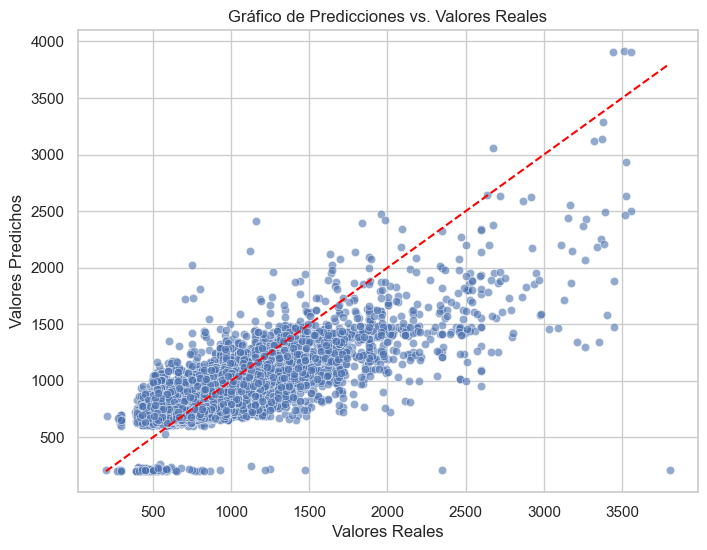

In [152]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test_original, y=Y_pred_original, alpha=0.6)  # Puntos dispersos
plt.plot([min(Y_test_original), max(Y_test_original)], [min(Y_test_original), max(Y_test_original)], color='red', linestyle='--')  # Línea ideal


# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Predicciones vs. Valores Reales")
plt.show()

In [153]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo en la escala original
mse_original = mean_squared_error(Y_test_original, Y_pred_original)
r2_original = r2_score(Y_test_original, Y_pred_original)

print(f'Error Cuadrático Medio (MSE) en escala original: {mse_original}')
print(f'R² Score en escala original: {r2_original}')

Error Cuadrático Medio (MSE) en escala original: 37779.52338776761
R² Score en escala original: 0.6354790184353217


## SQUARE FEET IN TEXAS

In [154]:
Data_TX = pd.read_csv('apartments_clean_TX.csv', sep=',', encoding='latin-1')

C:\Users\SANTI\AppData\Local\Temp\ipykernel_3288\3091345361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_to_model_2['Bathrooms+Beedrooms']=Data_to_model_2['bathrooms']+Data_to_model_2['bedrooms']


<Axes: >

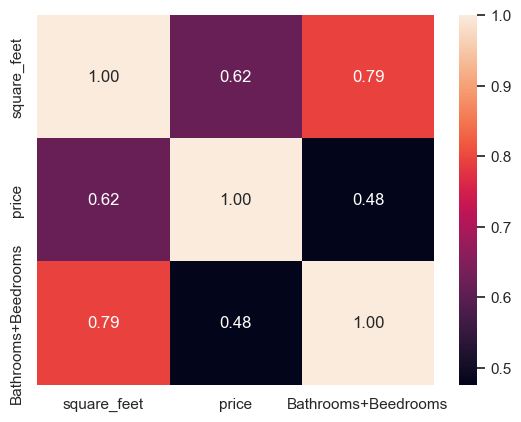

In [155]:
Data_to_model_2=Data_TX[['bathrooms','bedrooms','square_feet','price']]
Data_to_model_2['Bathrooms+Beedrooms']=Data_to_model_2['bathrooms']+Data_to_model_2['bedrooms']
Data_to_model_2=Data_to_model_2.drop(columns=['bathrooms','bedrooms'])
Corr=Data_to_model_2.corr()
Colums=Data_to_model_2.columns.values
sns.heatmap(Corr,cbar=True,annot=True,yticklabels=Colums,xticklabels=Colums,fmt=".2f")

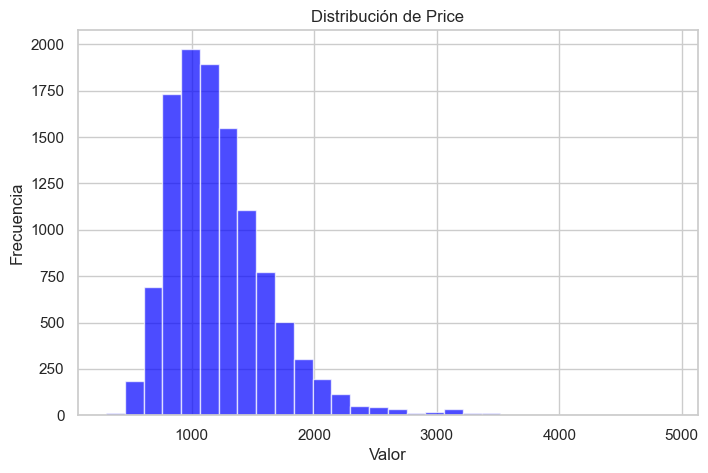

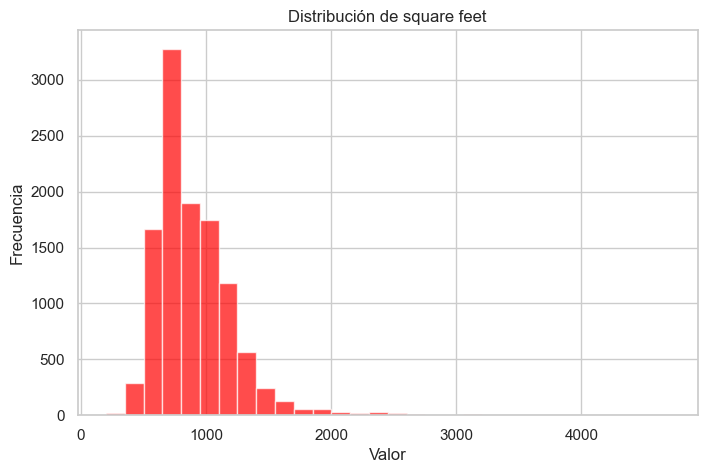

In [156]:
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.hist(Data_to_model_2['price'], bins=30, color='blue', alpha=0.7)
ax1.set_title("Distribución de Price")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")
plt.show()

# Crear segunda figura
fig2, ax2 = plt.subplots(figsize=(8, 5))

ax2.hist(Data_to_model_2['square_feet'], bins=30, color='red', alpha=0.7)
ax2.set_title("Distribución de square feet")
ax2.set_xlabel("Valor")
ax2.set_ylabel("Frecuencia")
plt.show()


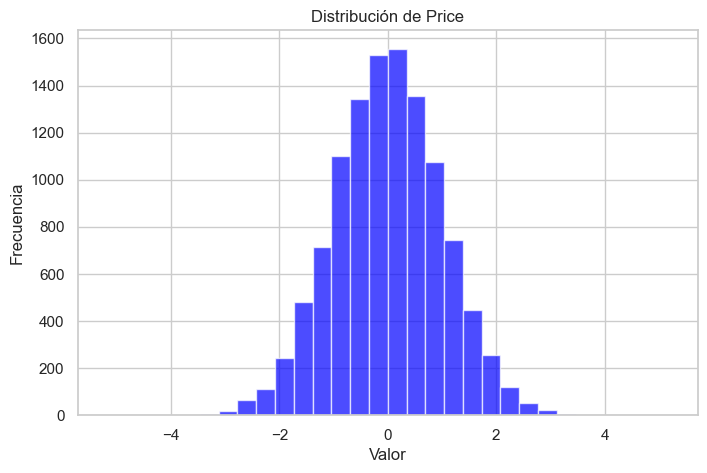

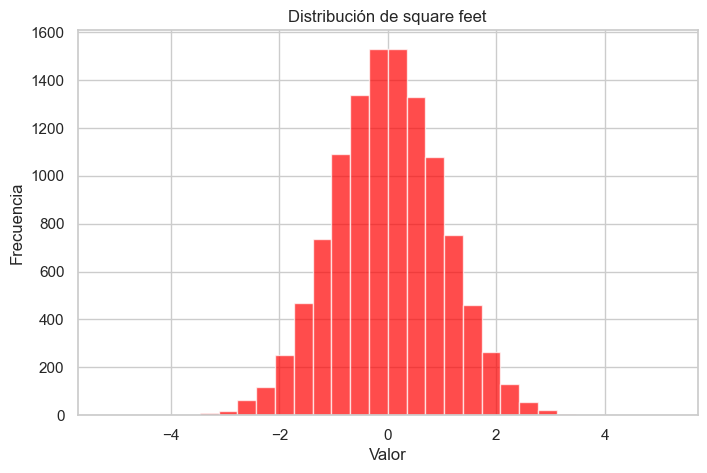

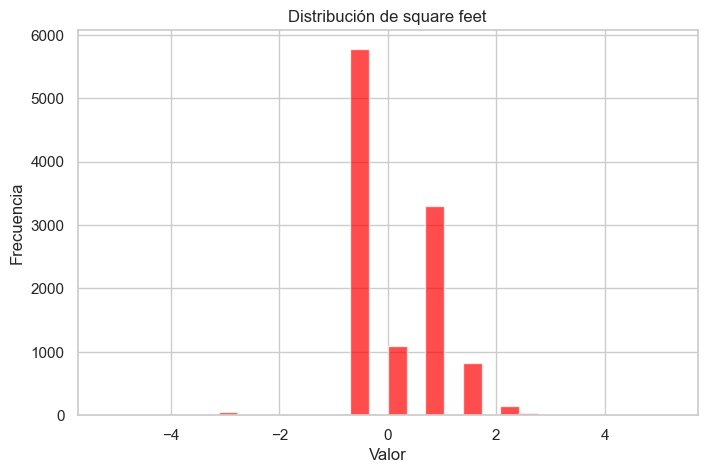

In [157]:
from sklearn.preprocessing import QuantileTransformer

Data_to_model_2['square_feet']=np.log10(Data_to_model_2['square_feet'])
scaler_square = QuantileTransformer(output_distribution='normal')
Data_to_model_2['square_feet'] = scaler_square.fit_transform(Data_to_model_2[['square_feet']])
Data_to_model_2['price']=np.log10(Data_to_model_2['price']+1)
scaler_price = QuantileTransformer(output_distribution='normal')
Data_to_model_2['price'] = scaler_price.fit_transform(Data_to_model_2[['price']])
scaler_Bb = QuantileTransformer(output_distribution='normal')
Data_to_model_2['Bathrooms+Beedrooms'] = scaler_Bb.fit_transform(Data_to_model_2[['Bathrooms+Beedrooms']])
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.hist(Data_to_model_2['price'], bins=30, color='blue', alpha=0.7)
ax1.set_title("Distribución de Price")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")
plt.show()

# Crear segunda figura
fig2, ax2 = plt.subplots(figsize=(8, 5))
ax2.hist(Data_to_model_2['square_feet'], bins=30, color='red', alpha=0.7)
ax2.set_title("Distribución de square feet")
ax2.set_xlabel("Valor")
ax2.set_ylabel("Frecuencia")
plt.show()
fig3, ax3 = plt.subplots(figsize=(8, 5))
ax3.hist(Data_to_model_2['Bathrooms+Beedrooms'], bins=30, color='red', alpha=0.7)
ax3.set_title("Distribución de square feet")
ax3.set_xlabel("Valor")
ax3.set_ylabel("Frecuencia")
plt.show()

                     square_feet     price  Bathrooms+Beedrooms
square_feet             1.000000  0.633273             0.759967
price                   0.633273  1.000000             0.462233
Bathrooms+Beedrooms     0.759967  0.462233             1.000000


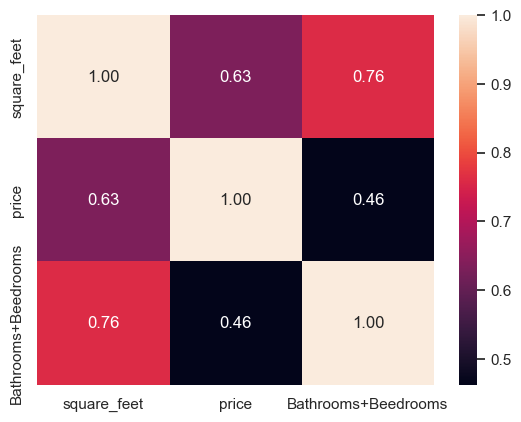

In [158]:

Corr_2=Data_to_model_2.corr()
Colums=Data_to_model_2.columns.values
sns.heatmap(Corr_2,cbar=True,annot=True,yticklabels=Colums,xticklabels=Colums,fmt=".2f")
print(Corr_2)

In [159]:
y = Data_to_model_2.pop('square_feet')
x=Data_to_model_2.copy()

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [161]:
lr=LinearRegression()
Mod_2=lr.fit(X_train,Y_train)


In [162]:
import statsmodels.api as sm
import numpy as np

# Agregar una constante a X_test (para el intercepto)
X_test_sm = sm.add_constant(X_test)

# Obtener los coeficientes desde el modelo entrenado
coeficientes = np.append(Mod_2.intercept_, Mod_2.coef_)

# Calcular los p-valores usando statsmodels
modelo_stats = sm.OLS(Y_test, X_test_sm).fit()

# Mostrar el resumen con p-valores
print(modelo_stats.summary())



                            OLS Regression Results                            
Dep. Variable:            square_feet   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2169.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:19:51   Log-Likelihood:                -1949.5
No. Observations:                2252   AIC:                             3905.
Df Residuals:                    2249   BIC:                             3922.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0229    

In [163]:
Mod_2.intercept_ = float(Mod_2.intercept_)  # Asegura que sea un escalar
Mod_2.coef_ = Mod_2.coef_.flatten()  # Convierte coeficientes en vector 1D
Y_test = Y_test.values.flatten()  # Convierte Y_test en vector 1D

# Predicciones
Y_pred = Mod_2.predict(X_test)

# Mostrar resultados
print('======= Summary ========')
print(f'Intercepto (b): {Mod_2.intercept_}')
print(f'Coeficientes (m): {Mod_2.coef_}')
print(f'Error Cuadrático Medio (MSE): {mean_squared_error(Y_test, Y_pred)}')
print(f'R² Score: {r2_score(Y_test, Y_pred)}')
print(Mod_2.score(X_test,Y_test))

======= Summary ========
Intercepto (b): -0.025771534929116727
Coeficientes (m): [0.36781519 0.71344961]
Error Cuadrático Medio (MSE): 0.3317111030149018
R² Score: 0.6575878829871008
0.6575878829871008


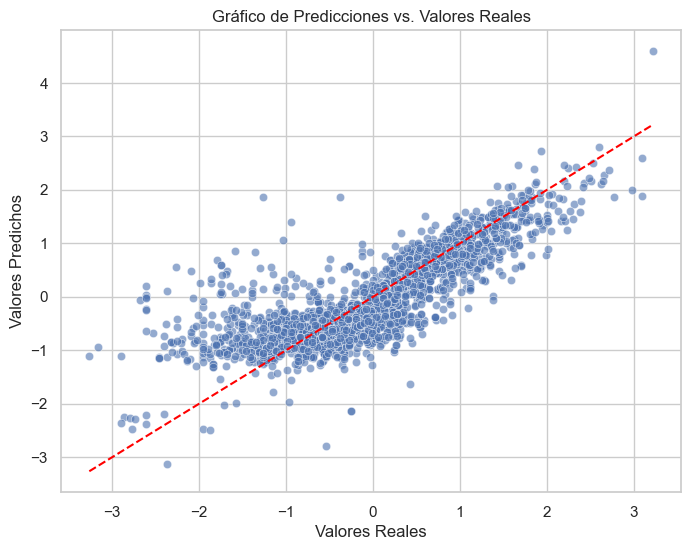

In [164]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.6)  # Puntos dispersos
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')  # Línea ideal

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Predicciones vs. Valores Reales")
plt.show()


In [165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 📌 Definir los modelos y sus hiperparámetros
param_grid = [
    {
        'model': [Ridge()],
        'model__alpha': [0.1, 1, 10, 100]
    },
    {
        'model': [Lasso()],
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, None]
    },
    {
        'model': [SVR()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    }
]

# 📌 Crear pipeline con escalado
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge())  # Modelo inicial (se reemplaza en GridSearch)
])

# 📌 Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Número de folds en validación cruzada
    scoring='r2',  # Métrica a optimizar
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=1  # Muestra progreso
)

# 📌 Entrenar en los datos
grid_search.fit(X_train, Y_train)

# 📌 Mostrar el mejor modelo y sus hiperparámetros
print("Mejor modelo:", grid_search.best_estimator_)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)


Fitting 5 folds for each of 23 candidates, totalling 115 fits
Mejor modelo: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=5, n_estimators=200))])
Mejores hiperparámetros: {'model': RandomForestRegressor(), 'model__max_depth': 5, 'model__n_estimators': 200}
Mejor R²: 0.6993668481830798


In [166]:
# Hacer predicciones en X_test
Y_pred_norm = Mod_2.predict(X_test)

# Deshacer la transformación de QuantileTransformer y la transformación logarítmica
Y_pred_original = 10 ** scaler_square.inverse_transform(Y_pred_norm.reshape(-1, 1)).flatten()

# Deshacer la transformación para Y_test para comparar con los valores originales
Y_test_original = 10 ** scaler_square.inverse_transform(Y_test.reshape(-1, 1)).flatten()


d:\Conda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
d:\Conda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


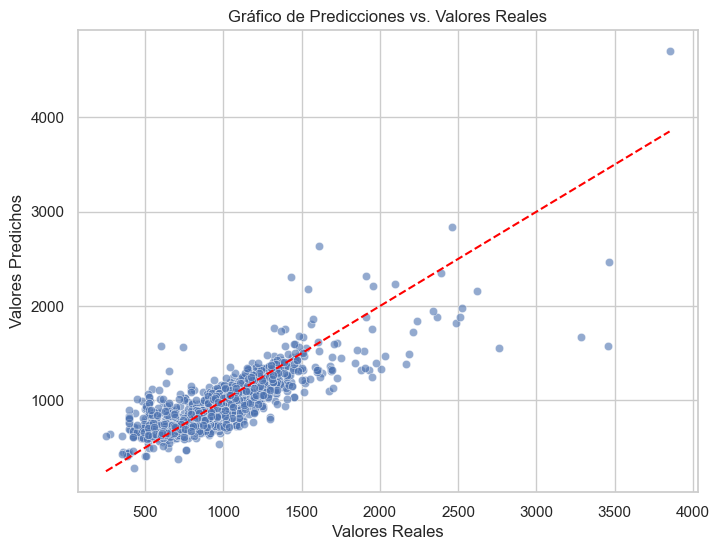

In [167]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test_original, y=Y_pred_original, alpha=0.6)  # Puntos dispersos
plt.plot([min(Y_test_original), max(Y_test_original)], [min(Y_test_original), max(Y_test_original)], color='red', linestyle='--')  # Línea ideal


# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Gráfico de Predicciones vs. Valores Reales")
plt.show()


In [168]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo en la escala original
mse_original = mean_squared_error(Y_test_original, Y_pred_original)
r2_original = r2_score(Y_test_original, Y_pred_original)

print(f'Error Cuadrático Medio (MSE) en escala original: {mse_original}')
print(f'R² Score en escala original: {r2_original}')


Error Cuadrático Medio (MSE) en escala original: 25752.798396521324
R² Score en escala original: 0.7277963234504099
